<a href="https://colab.research.google.com/github/gitgubbenito/PracticalApplicationAssignment2_11/blob/main/prompt_2_Argenis-Lopez-1.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?...

![](https://github.com/gitgubbenito/AI_ML/blob/main/images/kurt.jpeg?raw=1)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**I will understand Data Quality:**
 the available data

*   Duplicates
*   Missing Values
*   Outliers
*   Drop Redundant Features
*   Drop Redundant Features
*   Check for Cardinality
*   Key Identifying
*   Check for wrong data type
*   Data Columns in the dataset

Hypotesis on used car pricing


*   Based on my experience japanese cars are more desirable
*   The older the car are less desirable

















In [4]:
# Load vehicles.csv

import pandas as pd
# Load the vehicles.csv data using pandas
df = pd.read_csv('vehicles.csv')

In [5]:
# prompt: print how many of price are cero and percentaje

zeros = df['price'].value_counts().get(0, 0)
total = len(df['price'])
percentage = zeros / total * 100
print(f"There are {zeros} zeros in the 'price' column, which is {percentage:.2f}% of the data.")


There are 32895 zeros in the 'price' column, which is 7.71% of the data.


In [6]:
# prompt: fill price in cero using stadistics method

import numpy as np

# Calculate the mean of the non-zero prices
non_zero_prices = df[df['price'] > 0]['price']
mean_price = np.mean(non_zero_prices)

# Fill the zero prices with the mean price
df['price'] = df['price'].replace(0, mean_price)
print(mean_price)


81477.62804929122


In [7]:
# prompt: how many of null values and ceros are in the DF

null_values = df.isnull().sum()
zeros = df.eq(0).sum()

print("Number of null values in each column:")
print(null_values)

print("\nNumber of zeros in each column:")
print(zeros)


Number of null values in each column:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

Number of zeros in each column:
id                 0
region             0
price              0
year               0
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer        1965
title_status       0
transmission       0
VIN                0
drive              0
size               0
type               0
paint_color        0
state              0
dtype: int64


**# I will assume odometer in cero means new or almost new car**

In [14]:
# Find the mode (most frequent value) for the categorical column
mode_value = df['condition'].mode()[0]

# Replace null values with the mode
df['condition'].fillna(mode_value, inplace=True)
null_values_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of null values in each column:")
print(null_values_percentage)




Percentage of null values in each column:
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition        0.000000
cylinders        0.000000
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


In [15]:
# Find the mode (most frequent value) for the categorical column
mode_value = df['cylinders'].mode()[0]

# Replace null values with the mode
df['cylinders'].fillna(mode_value, inplace=True)
null_values_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of null values in each column:")
print(null_values_percentage)


Percentage of null values in each column:
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition        0.000000
cylinders        0.000000
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


In [10]:
# prompt: drop VIN, id

df = df.drop(['VIN', 'id'], axis=1)


In [11]:
df.manufacturer.value_counts().head(10)
df.model.value_counts().head(10)

model
f-150             8009
silverado 1500    5140
1500              4211
camry             3135
silverado         3023
accord            2969
wrangler          2848
civic             2799
altima            2779
escape            2746
Name: count, dtype: int64

In [12]:
# prompt: remove outliers

# Remove outliers using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Check the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_filtered)}")


Number of rows before removing outliers: 426880
Number of rows after removing outliers: 389606


In [13]:
popular_brands = df.manufacturer.value_counts().head(10)
popular_brands

manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
gmc          16785
bmw          14699
dodge        13707
Name: count, dtype: int64

In [ ]:
popular_models = df.model.value_counts().head(10)
popular_models

model
f-150             8009
silverado 1500    5140
1500              4211
camry             3135
silverado         3023
accord            2969
wrangler          2848
civic             2799
altima            2779
escape            2746
Name: count, dtype: int64

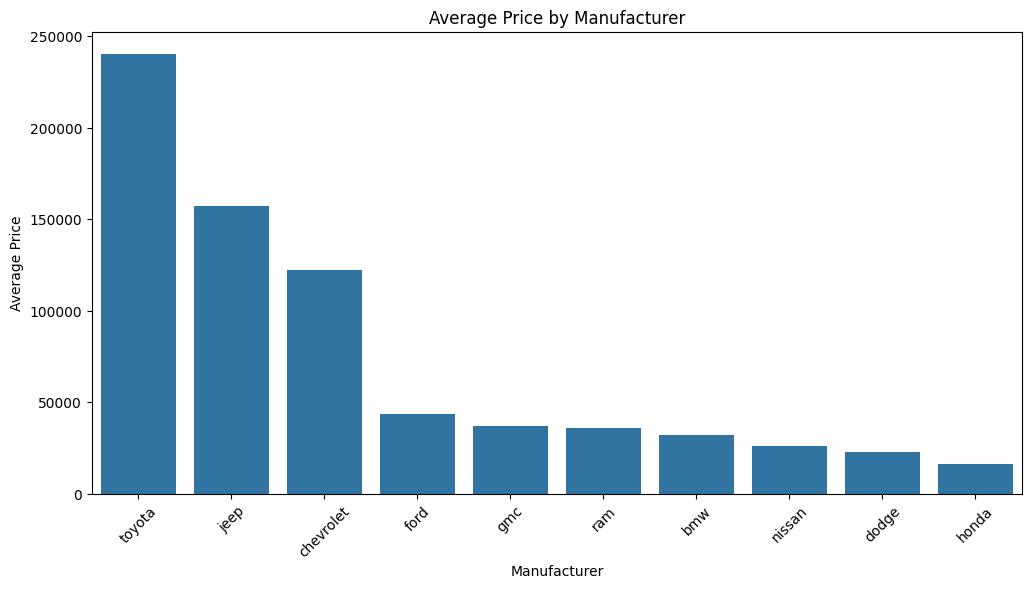

In [ ]:
# prompt: plot barchart price vs top 10 manufacturer

import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 manufacturers by number of cars
top_manufacturers = df['manufacturer'].value_counts().head(10).index.to_list()

# Filter the DataFrame to only include the top 10 manufacturers
df_filtered = df[df['manufacturer'].isin(top_manufacturers)]

# Group by manufacturer and calculate the average price
average_price_by_manufacturer = df_filtered.groupby('manufacturer')['price'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_manufacturer.index, y=average_price_by_manufacturer.values)

# Add a title and labels
plt.title('Average Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# prompt: remove outliers for price

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Check the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_filtered)}")


Number of rows before removing outliers: 426880
Number of rows after removing outliers: 389606


In [ ]:
# prompt: list top 10 price for toyota

top_10_toyota = df[df['manufacturer'] == 'toyota'].sort_values(by='price', ascending=False).head(10)
print(top_10_toyota['price'])


318592    3.736929e+09
356716    3.736929e+09
354857    1.315000e+05
134512    1.234560e+05
334078    9.877200e+04
158088    9.097800e+04
277193    8.499900e+04
163719    8.370000e+04
366295    8.250000e+04
276614    8.147763e+04
Name: price, dtype: float64


<Axes: xlabel='model'>

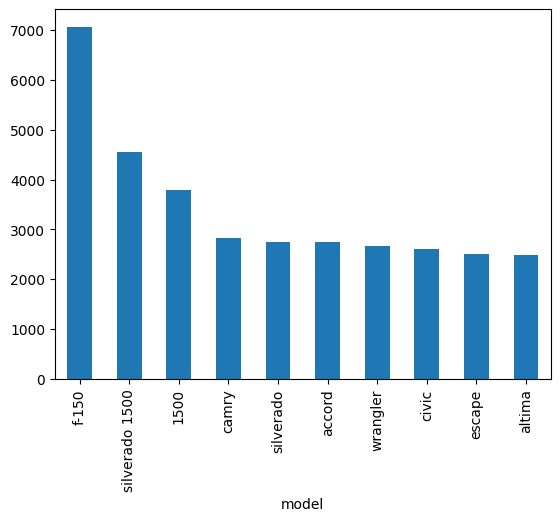

In [ ]:
# prompt: create a bar plot for model vs price for top 10 model, remove outliers of price for column model

df_filtered['model'].value_counts().head(10).plot(kind='bar')




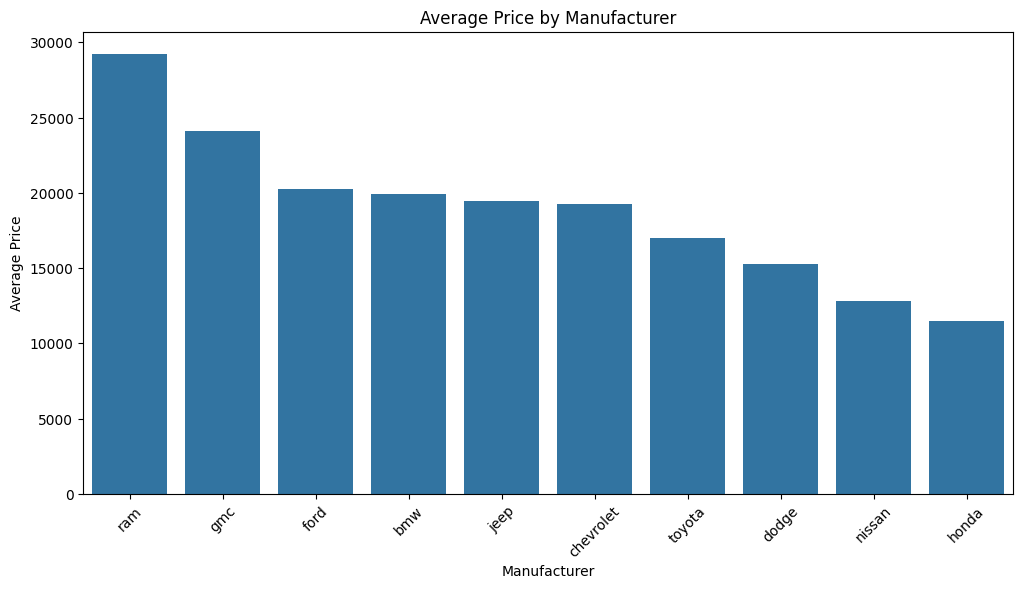

In [ ]:
# prompt: create a bar plot for manufactorer vs price for top 10 manufacturer , remove outliers of price for column manufacturer

import matplotlib.pyplot as plt
# Get the top 10 manufacturers by number of cars
top_manufacturers = df['manufacturer'].value_counts().head(10).index.to_list()

# Filter the DataFrame to only include the top 10 manufacturers
df_filtered = df[df['manufacturer'].isin(top_manufacturers)]

# Remove outliers using IQR
Q1 = df_filtered['price'].quantile(0.25)
Q3 = df_filtered['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_filtered[(df_filtered['price'] >= lower_bound) & (df_filtered['price'] <= upper_bound)]

# Group by manufacturer and calculate the average price
average_price_by_manufacturer = df_filtered.groupby('manufacturer')['price'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_manufacturer.index, y=average_price_by_manufacturer.values)

# Add a title and labels
plt.title('Average Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# prompt: show me the top 15 price of wrangler model

df_wrangler = df[df['model'] == 'wrangler']
df_wrangler.sort_values(by='price', ascending=False).head(15)


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
184704,frederick,1.410065e+09,1989.0,jeep,wrangler,good,6 cylinders,diesel,103000.0,clean,manual,NaN,NaN,SUV,NaN,md
155421,terre haute,1.234567e+06,2006.0,jeep,wrangler,like new,6 cylinders,gas,123456.0,clean,automatic,4wd,mid-size,SUV,custom,in
133497,east idaho,4.250000e+05,1993.0,jeep,wrangler,good,6 cylinders,gas,380.0,clean,automatic,NaN,NaN,NaN,red,id
367026,brownsville,1.350000e+05,2009.0,jeep,wrangler,like new,6 cylinders,gas,217000.0,clean,automatic,NaN,NaN,NaN,NaN,tx
150253,evansville,1.234560e+05,2006.0,jeep,wrangler,excellent,6 cylinders,gas,12345.0,clean,other,NaN,NaN,NaN,NaN,in
145798,southern illinois,1.234560e+05,2006.0,jeep,wrangler,excellent,6 cylinders,gas,123456.0,clean,other,4wd,NaN,NaN,NaN,il
180920,annapolis,9.500000e+04,2011.0,jeep,wrangler,excellent,8 cylinders,gas,13000.0,clean,automatic,4wd,NaN,NaN,black,md
262847,santa fe / taos,8.699900e+04,2021.0,jeep,wrangler,new,6 cylinders,gas,10.0,clean,automatic,NaN,NaN,NaN,NaN,nm
325863,salem,8.147763e+04,2013.0,jeep,wrangler,good,6 cylinders,gas,104043.0,clean,automatic,4wd,NaN,SUV,NaN,or
320406,medford-ashland,8.147763e+04,2020.0,jeep,wrangler,good,4 cylinders,gas,7618.0,clean,automatic,4wd,NaN,SUV,NaN,or


KeyboardInterrupt: 

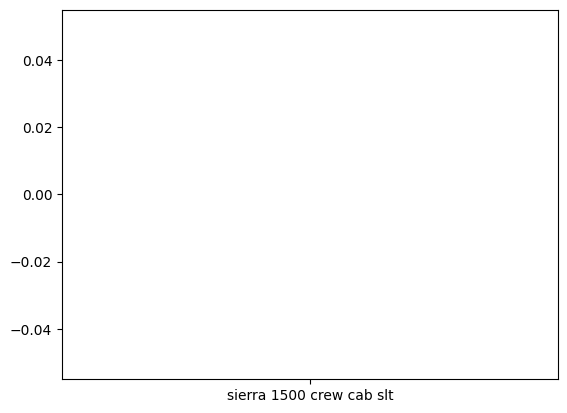

In [ ]:
# prompt: bar price vs models

import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart of price vs. model
sns.barplot(x="model", y="price", data=df)
plt.xticks(rotation=90)
plt.show()


In [ ]:
# prompt: list df for model toyota give me top 10 price of model

df_toyota = df[df['manufacturer'] == 'toyota']
top_10_toyota = df_toyota.sort_values(by='price', ascending=False).head(10)
print(top_10_toyota[['model', 'price']])


                     model       price
356716             4runner  3736928711
318592              tundra  3736928711
354857              tundra      131500
134512  tundra limited 4x4      123456
334078               prius       98772
158088        land cruiser       90978
277193               supra       84999
163719        land cruiser       83700
366295         landcruiser       82500
7369            sienna xle       78900


In [ ]:
# prompt: what is the average price of toyota modes

average_price = df_toyota['price'].mean()
print(f"The average price of Toyota models is {average_price:.2f}")


The average price of Toyota models is 234294.68


In [ ]:
# prompt: create another dataframe just for top_10_toyota

top_10_toyota_df = df_toyota.sort_values(by='price', ascending=False).head(10)
df.head(10)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [ ]:
# prompt: calculate unique values for model column

unique_models = df['model'].nunique()
print(f"There are {unique_models} unique models in the dataset.")


There are 29649 unique models in the dataset.


In [ ]:
# prompt: remove outliers

import pandas as pd

# Load the data
df = pd.read_csv('vehicles.csv')

# Remove outliers using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Print the number of rows in the filtered data
print(f"There are {len(df_filtered)} rows in the filtered data.")


There are 418703 rows in the filtered data.


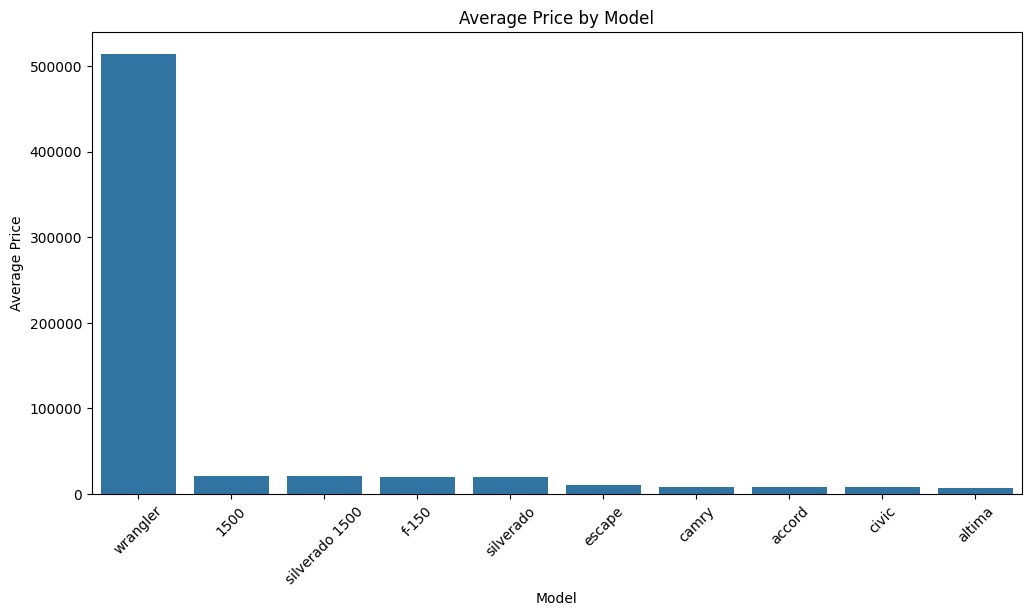

In [ ]:
# prompt: plot price vs top 10 by model

import matplotlib.pyplot as plt
# Get the top 10 models by number of cars
top_models = df['model'].value_counts().head(10).index.to_list()

# Filter the DataFrame to only include the top 10 models
df_filtered = df[df['model'].isin(top_models)]

# Group by model and calculate the average price
average_price_by_model = df_filtered.groupby('model')['price'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_model.index, y=average_price_by_model.values)

# Add a title and labels
plt.title('Average Price by Model')
plt.xlabel('Model')
plt.ylabel('Average Price')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# prompt: give me the to top 10 highest  price for model wrangler also do a count for each model with that price

highest_price_wrangler = df[df['model'] == 'wrangler'].sort_values(by='price', ascending=False).head(10)
highest_price_wrangler_count = highest_price_wrangler.groupby('price').size().reset_index(name='count')
print(highest_price_wrangler_count)


        price  count
0       58995      2
1       86999      1
2       95000      1
3      123456      2
4      135000      1
5      425000      1
6     1234567      1
7  1410065407      1


In [ ]:
# prompt: remove outliers

import pandas as pd

# Load the data
df = pd.read_csv('vehicles.csv')

# Remove outliers using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Print the number of rows in the filtered data
print(f"There are {len(df_filtered)} rows in the filtered data.")


There are 418703 rows in the filtered data.


In [ ]:
df_filtered.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
306955,7307795016,oklahoma city,7900,2016.0,kia,forte,NaN,NaN,gas,97658.0,clean,automatic,KNAFK4A64G5608418,NaN,NaN,sedan,NaN,ok
186980,7314976657,boston,38990,2015.0,bmw,6 series 650i convertible 2d,good,NaN,other,55035.0,clean,other,WBAYP9C52FD169591,NaN,NaN,other,black,ma
230292,7313028142,asheville,21931,2014.0,jeep,grand cherokee,NaN,6 cylinders,diesel,116137.0,clean,automatic,1C4RJFCM7EC371801,4wd,mid-size,SUV,silver,nc
418407,7316324176,kenosha-racine,3999,2004.0,chevrolet,trailblazer ext,like new,8 cylinders,gas,160288.0,clean,automatic,NaN,4wd,NaN,SUV,NaN,wi
156614,7315919803,des moines,19500,2018.0,dodge,journey gt sport utility,NaN,NaN,gas,76000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,ia
127377,7308787459,valdosta,26261,2021.0,ford,transit connect van xl,NaN,NaN,gas,6.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,ga
286216,7307921942,north dakota,2500,1996.0,jeep,grand cherokee,good,6 cylinders,gas,93000.0,clean,automatic,NaN,4wd,full-size,SUV,white,nd
279580,7307181361,rochester,46990,2020.0,gmc,yukon slt sport utility 4d,good,8 cylinders,gas,28552.0,clean,other,1GKS1BKC9LR212585,NaN,NaN,other,white,ny
192404,7312809406,worcester / central MA,13900,2014.0,subaru,outback,like new,4 cylinders,gas,108767.0,clean,automatic,NaN,4wd,NaN,wagon,grey,ma
301193,7316881015,sandusky,0,2017.0,toyota,camry,NaN,NaN,gas,25889.0,clean,automatic,4T1BF1FK8HU335481,fwd,NaN,other,black,oh


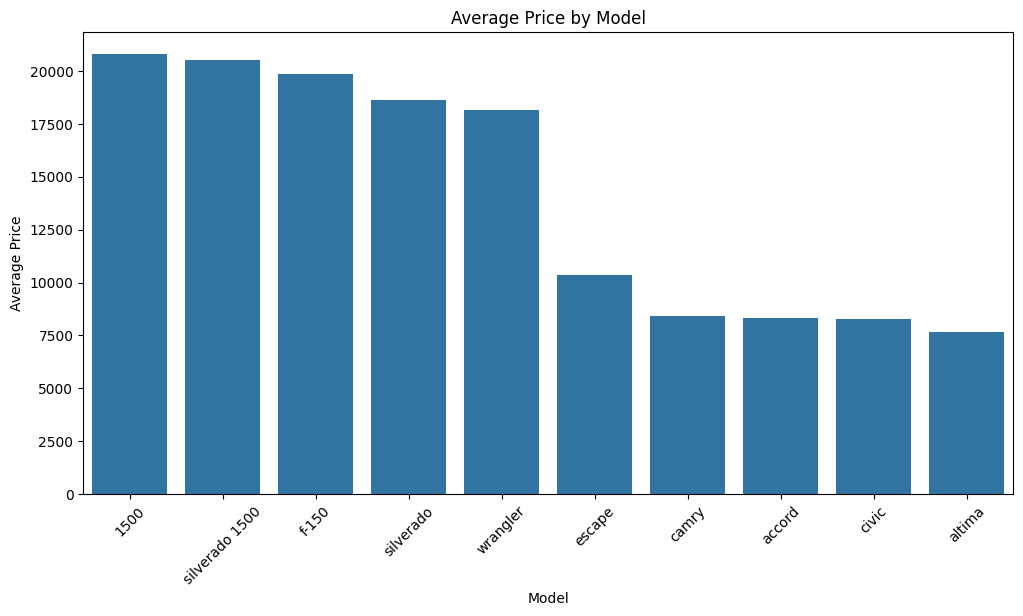

In [ ]:
# prompt: plot price vs top 10 by model

import matplotlib.pyplot as plt
# Get the top 10 models by number of cars
top_models = df_filtered['model'].value_counts().head(10).index.to_list()

# Filter the DataFrame to only include the top 10 models
df_top_10 = df_filtered[df_filtered['model'].isin(top_models)]

# Group by model and calculate the average price
average_price_by_model = df_top_10.groupby('model')['price'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_model.index, y=average_price_by_model.values)

# Add a title and labels
plt.title('Average Price by Model')
plt.xlabel('Model')
plt.ylabel('Average Price')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# prompt: generate a data profiling report on the dataset

!pip install ydata_profiling
import pandas as pd
from ydata_profiling import ProfileReport

# Load the vehicles.csv data using pandas
df = pd.read_csv('vehicles.csv')

# Generate a data profiling report on the dataset
profile = ProfileReport(df)
profile.to_file(output_file="output.html")


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
!pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
# prompt: do a target encoding on each non numerical column

import category_encoders as ce

# Create a target encoder for each non-numerical column
encoders = {}
for column in df.select_dtypes(include='object'):
  encoders[column] = ce.TargetEncoder(cols=[column])
  encoders[column].fit(df[column], df['price'])

# Transform each non-numerical column using the corresponding encoder
for column in df.select_dtypes(include='object'):
  df[column] = encoders[column].transform(df[column])


In [ ]:
# prompt: what encoder was used for each colum

for column in df.select_dtypes(include='object'):
  print(f"Encoder for column '{column}': {encoders[column]}")


In [ ]:
# Calculate the percentage of missing values per column
missing_values = df.isnull().sum() / len(df) * 100

# Print the percentage of missing values for each column
for column, missing_percentage in missing_values.items():
  print(f"Column: {column}, Missing values: {missing_percentage:.2f}%")

Column: id, Missing values: 0.00%
Column: region, Missing values: 0.00%
Column: price, Missing values: 0.00%
Column: year, Missing values: 0.28%
Column: manufacturer, Missing values: 0.00%
Column: model, Missing values: 0.00%
Column: condition, Missing values: 0.00%
Column: cylinders, Missing values: 0.00%
Column: fuel, Missing values: 0.00%
Column: odometer, Missing values: 1.03%
Column: title_status, Missing values: 0.00%
Column: transmission, Missing values: 0.00%
Column: drive, Missing values: 0.00%
Column: size, Missing values: 0.00%
Column: type, Missing values: 0.00%
Column: paint_color, Missing values: 0.00%
Column: state, Missing values: 0.00%


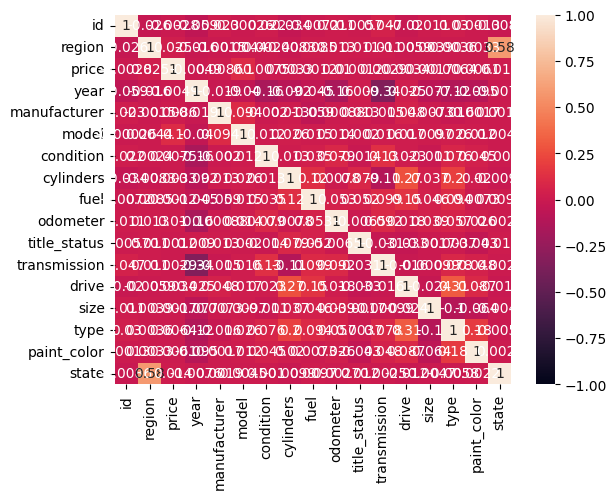

In [ ]:
# prompt: can you create a correlational matrix and plot it using sns

import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap of the correlation matrix
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
plt.show()


In [ ]:
# prompt: check for unique values in each column

# Calculate the number of unique values in each column
unique_values = df.nunique()

# Print the number of unique values for each column
for column, unique_value in unique_values.items():
  print(f"Column: {column}, Unique values: {unique_value}")


Column: id, Unique values: 426880
Column: region, Unique values: 404
Column: price, Unique values: 15655
Column: year, Unique values: 114
Column: manufacturer, Unique values: 42
Column: model, Unique values: 29649
Column: condition, Unique values: 6
Column: cylinders, Unique values: 8
Column: fuel, Unique values: 5
Column: odometer, Unique values: 104870
Column: title_status, Unique values: 6
Column: transmission, Unique values: 3
Column: drive, Unique values: 3
Column: size, Unique values: 4
Column: type, Unique values: 13
Column: paint_color, Unique values: 12
Column: state, Unique values: 51


In [ ]:
# prompt: generate a df sample and show it

df.sample(5)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
229814,7302060490,23889.040639,29998,1995.0,150717.819659,40800.090687,97541.494498,87849.660127,73902.259659,100.0,78443.777208,74881.003396,112029.802811,69495.877406,204624.532426,124930.757947,23515.942326
176412,7311641155,14208.433762,10495,2013.0,18827.332826,7665.078086,97541.494498,87849.660127,73902.259659,76924.0,78443.777208,74881.003396,15300.884682,69495.877406,15950.185076,22550.387556,17929.547872
209649,7309212439,18142.182773,4495,2004.0,18827.332826,25859.928128,97541.494498,87849.660127,73902.259659,184765.0,78443.777208,74881.003396,101915.072966,69495.877406,204624.532426,124930.757947,30072.554438
94971,7312785777,21376.665313,3750,2005.0,19561.849229,51654.452213,32545.203102,58696.317058,73902.259659,123296.0,78443.777208,74881.003396,40795.615635,69495.877406,21937.563424,43380.897790,17852.280137
75113,7303655149,19186.996568,41590,2020.0,23574.849993,42177.696739,32545.203102,87849.660127,73902.259659,27160.0,78443.777208,30003.788376,101915.072966,69495.877406,15950.185076,43380.897790,18117.450307


<Axes: xlabel='price', ylabel='Count'>

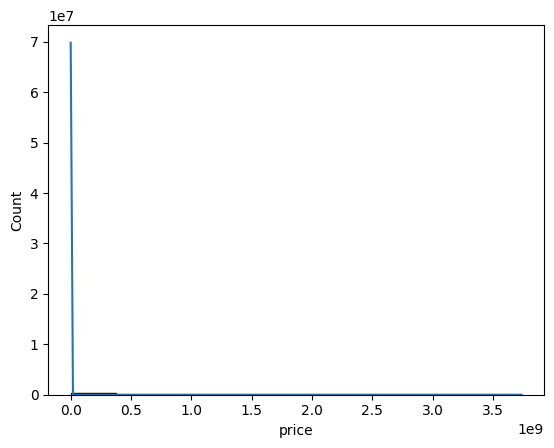

In [ ]:
# prompt: can you create a histogram of price using sns libraary

import seaborn as sns
sns.histplot(df['price'], bins=10, kde=True)


In [ ]:
# prompt: drop vin column

df = df.drop('VIN', axis=1)
df = df.drop('id', axis=1)


In [ ]:
# prompt: apply TargetEncoder  to the dataset and show me the resulting values

from category_encoders import TargetEncoder

# Create a TargetEncoder object
te = TargetEncoder()

# Fit the encoder to the data
te.fit(df.drop('price', axis=1), df['price'])

# Transform the data
df_encoded = te.transform(df.drop('price', axis=1))

# Print the encoded data
print(df_encoded.head())


           id        region  year  manufacturer         model      condition  \
0  7222695916  25288.953083   NaN   34277.64047  1.258139e+06  101563.500369   
1  7218891961  17025.174327   NaN   34277.64047  1.258139e+06  101563.500369   
2  7221797935  25285.759216   NaN   34277.64047  1.258139e+06  101563.500369   
3  7222270760  15248.206897   NaN   34277.64047  1.258139e+06  101563.500369   
4  7210384030  17486.631858   NaN   34277.64047  1.258139e+06  101563.500369   

      cylinders          fuel  odometer  title_status  transmission  \
0  91184.424882  17682.548456       NaN  14966.420956  14776.371753   
1  91184.424882  17682.548456       NaN  14966.420956  14776.371753   
2  91184.424882  17682.548456       NaN  14966.420956  14776.371753   
3  91184.424882  17682.548456       NaN  14966.420956  14776.371753   
4  91184.424882  17682.548456       NaN  14966.420956  14776.371753   

             VIN          drive          size           type    paint_color  \
0  171167.482

In [ ]:
df.describe()

,id,price,year,odometer
count,4.063090e+05,4.063080e+05,405196.000000,4.021470e+05
mean,7.311502e+09,7.804802e+04,2011.238655,9.822975e+04
std,4.459554e+06,1.248687e+07,9.467078,2.161315e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308183e+09,5.900000e+03,2008.000000,3.772500e+04
50%,7.312703e+09,1.390000e+04,2013.000000,8.566200e+04
75%,7.315245e+09,2.599900e+04,2017.000000,1.335380e+05
max,7.317095e+09,3.736929e+09,2022.000000,1.000000e+07


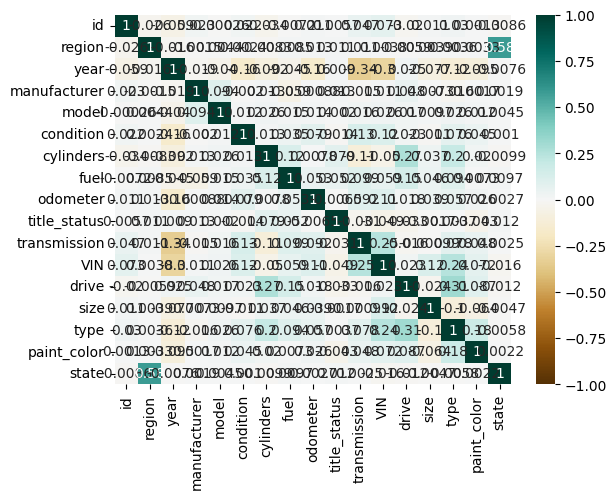

In [ ]:
# prompt: create a cirrelation matrix heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = df_encoded.corr()

# Create a heatmap
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Display the heatmap
plt.show()


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

Column: id, Missing values: 0.00%
Column: region, Missing values: 0.00%
Column: price, Missing values: 0.00%
Column: year, Missing values: 0.28%
Column: manufacturer, Missing values: 4.13%
Column: model, Missing values: 1.24%
Column: condition, Missing values: 40.79%
Column: cylinders, Missing values: 41.62%
Column: fuel, Missing values: 0.71%
Column: odometer, Missing values: 1.03%
Column: title_status, Missing values: 1.93%
Column: transmission, Missing values: 0.60%
Column: VIN, Missing values: 37.73%
Column: drive, Missing values: 30.59%
Column: size, Missing values: 71.77%
Column: type, Missing values: 21.75%
Column: paint_color, Missing values: 30.50%
Column: state, Missing values: 0.00%


In [ ]:
# prompt:  print the datatype for each column

print(df.dtypes)


id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


In [ ]:
missing_values = df.isnull().sum() / len(df) * 100

# Print the percentage of missing values for each column
for column, missing_percentage in missing_values.items():
  print(f"Column: {column}, Missing values: {missing_percentage:.2f}%")

Column: id, Missing values: 0.00%
Column: region, Missing values: 0.00%
Column: price, Missing values: 0.00%
Column: year, Missing values: 0.28%
Column: manufacturer, Missing values: 4.13%
Column: model, Missing values: 1.24%
Column: condition, Missing values: 40.79%
Column: cylinders, Missing values: 41.62%
Column: fuel, Missing values: 0.71%
Column: odometer, Missing values: 1.03%
Column: title_status, Missing values: 1.93%
Column: transmission, Missing values: 0.60%
Column: VIN, Missing values: 37.73%
Column: drive, Missing values: 30.59%
Column: size, Missing values: 71.77%
Column: type, Missing values: 21.75%
Column: paint_color, Missing values: 30.50%
Column: state, Missing values: 0.00%


SyntaxError: invalid syntax (<ipython-input-16-5f9a01785fa0>, line 1)

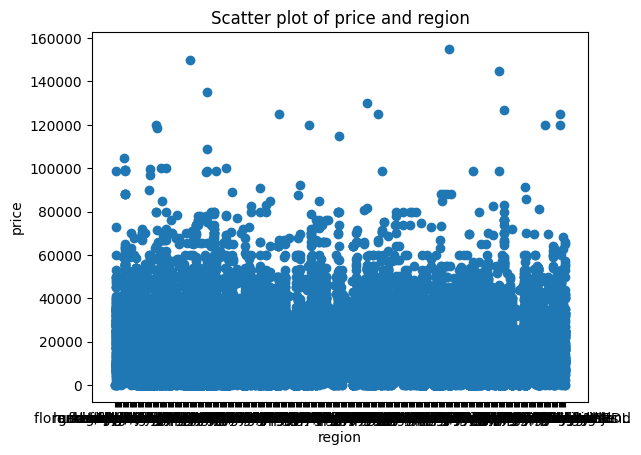

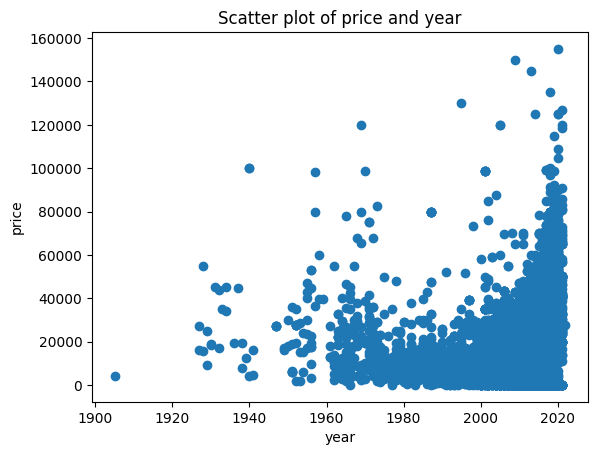

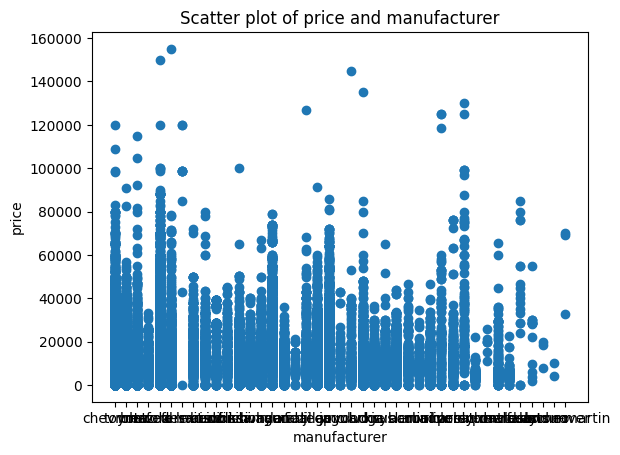

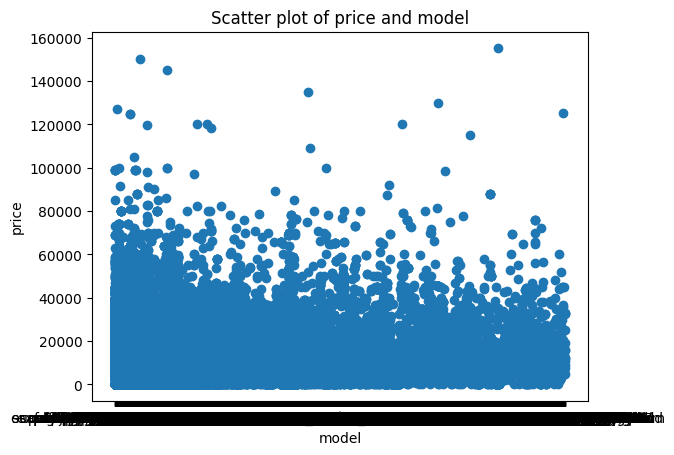

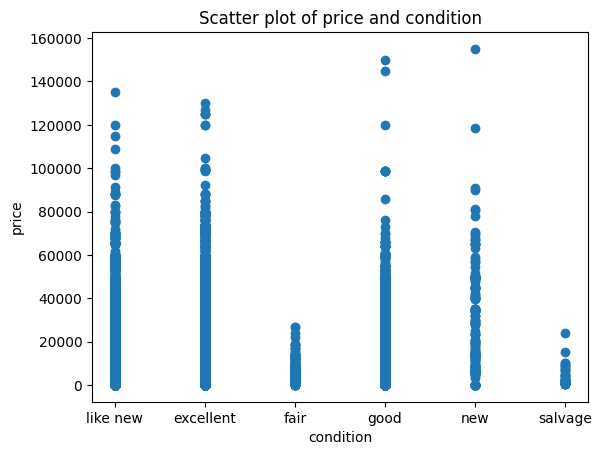

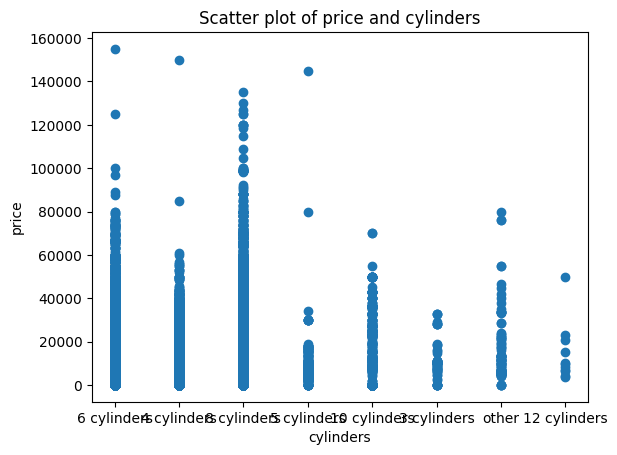

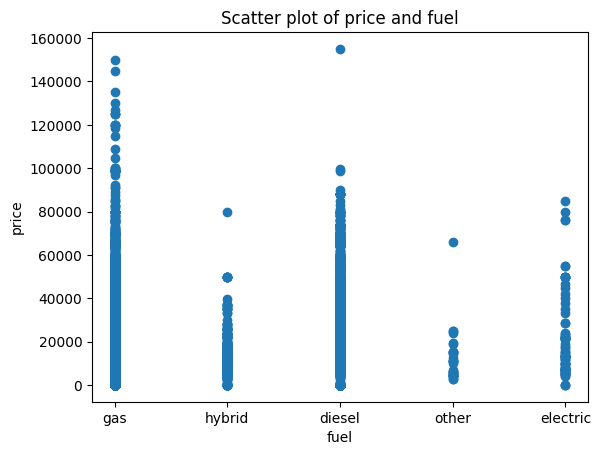

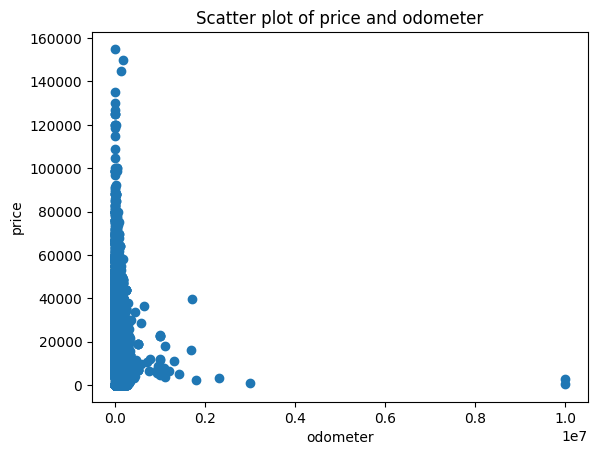

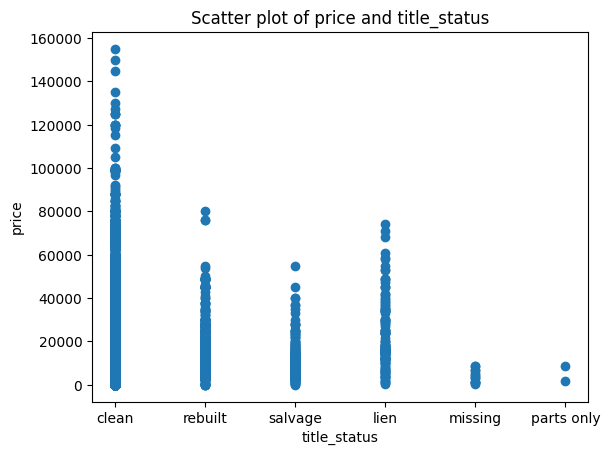

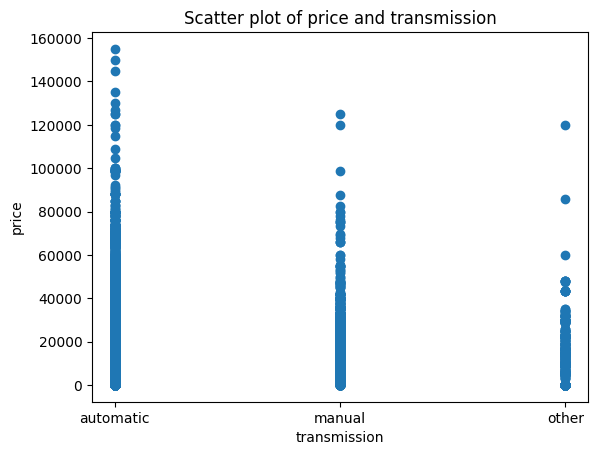

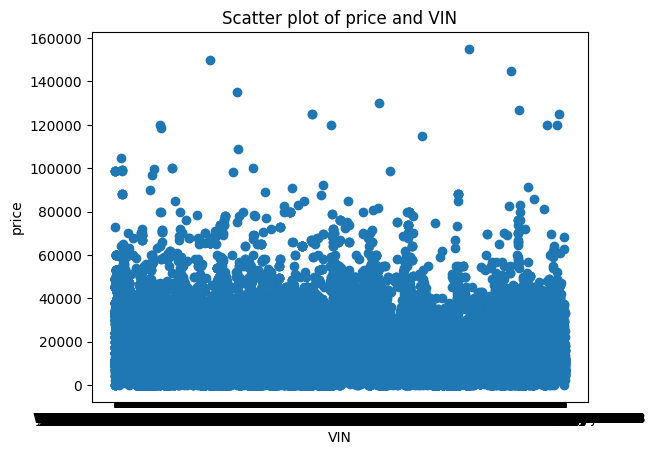

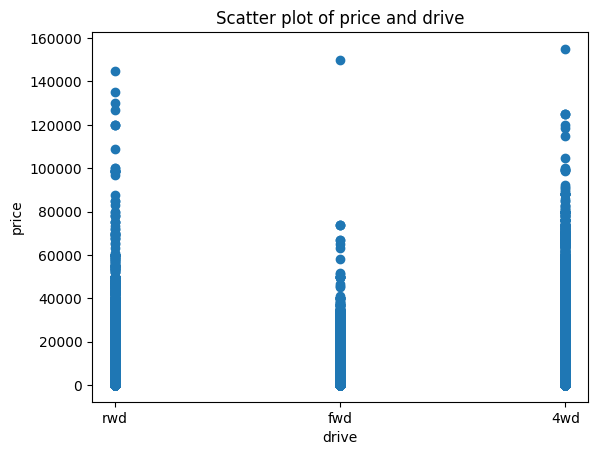

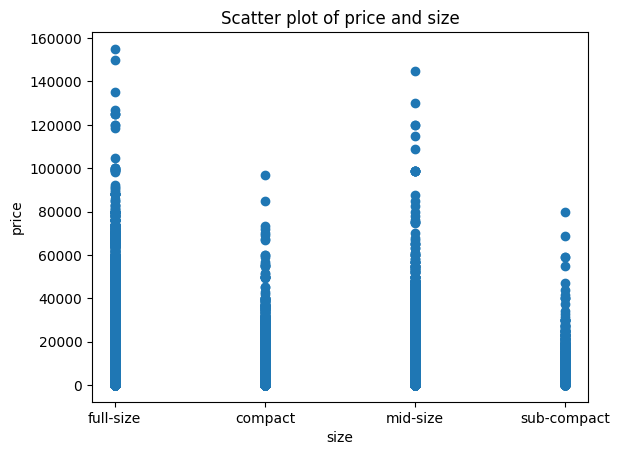

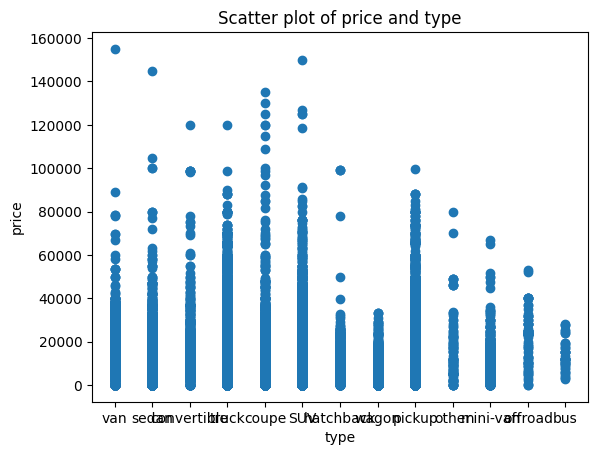

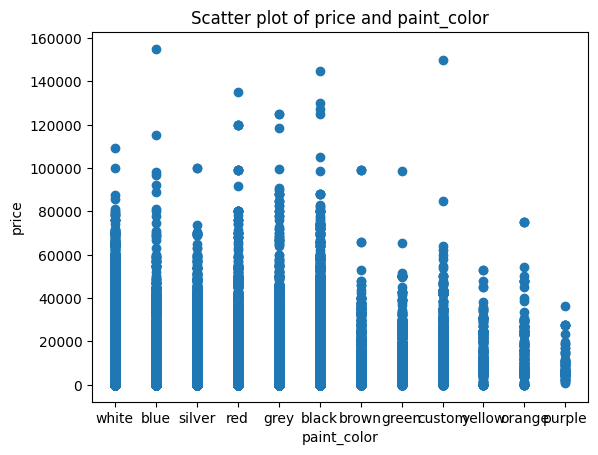

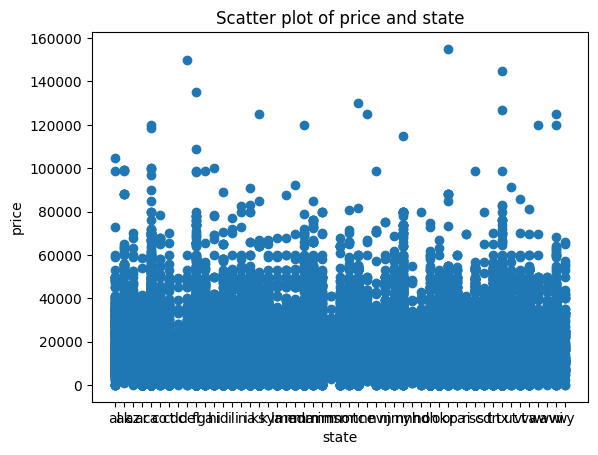

In [ ]:
# prompt: scatter plot price and the rest of feature in each feature in it owns grafic

import matplotlib.pyplot as plt

for column in df.columns:
  if column != 'price':
    plt.figure()
    plt.scatter(df[column], df['price'])
    plt.xlabel(column)
    plt.ylabel('price')
    plt.title(f'Scatter plot of price and {column}')
    plt.show()


In [ ]:
df.shape

df.drop_duplicates
df.dropna(inplace=True)
missing_values = df.isnull().sum() / len(df) * 100

# Print the percentage of missing values for each column
for column, missing_percentage in missing_values.items():
  print(f"Column: {column}, Missing values: {missing_percentage:.2f}%")

Column: id, Missing values: 0.00%
Column: region, Missing values: 0.00%
Column: price, Missing values: 0.00%
Column: year, Missing values: 0.00%
Column: manufacturer, Missing values: 0.00%
Column: model, Missing values: 0.00%
Column: condition, Missing values: 0.00%
Column: cylinders, Missing values: 0.00%
Column: fuel, Missing values: 0.00%
Column: odometer, Missing values: 0.00%
Column: title_status, Missing values: 0.00%
Column: transmission, Missing values: 0.00%
Column: VIN, Missing values: 0.00%
Column: drive, Missing values: 0.00%
Column: size, Missing values: 0.00%
Column: type, Missing values: 0.00%
Column: paint_color, Missing values: 0.00%
Column: state, Missing values: 0.00%


In [ ]:
df.describe()

,id,price,year,odometer
count,3.486800e+04,34868.000000,34868.000000,3.486800e+04
mean,7.311508e+09,15837.446771,2011.176867,1.073991e+05
std,4.299751e+06,13460.056823,7.162332,9.990878e+04
min,7.301592e+09,0.000000,1905.000000,0.000000e+00
25%,7.308189e+09,6500.000000,2008.000000,6.516400e+04
50%,7.312225e+09,12000.000000,2013.000000,1.040000e+05
75%,7.315136e+09,22003.500000,2016.000000,1.411678e+05
max,7.317099e+09,155000.000000,2022.000000,9.999999e+06


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>, <Axes: >]], dtype=object)

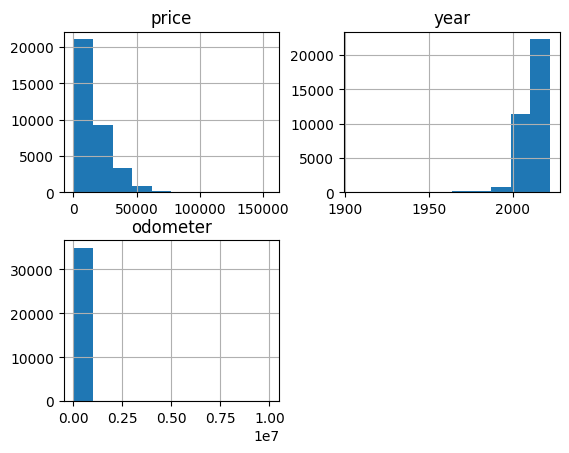

In [ ]:
# prompt: drop ID column then create histogram

df = df.drop(columns=['id'])
df.hist()


In [ ]:
# prompt: drop na values
df.dropna(inplace=True)

In [ ]:
# prompt: give me a count check for duplicate values

df.duplicated().sum()


NameError: name 'df' is not defined

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.